# New Section

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.3/170.3 kB 4.9 MB/s eta 0:00:00


   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0       79545.45857             5.682861                   7.009188   
1       79248.64245             6.002900                   6.730821   
2       61287.06718             5.865890                   8.512727   
3       63345.24005             7.188236                   5.586729   
4       59982.19723             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09      23086.80050  1.059034e+06   
1                          3.09      40173.07217  1.505891e+06   
2                          5.13      36882.15940  1.058988e+06   
3                          3.26      34310.24283  1.260617e+06   
4                          4.23      26354.10947  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Eli

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


<Figure size 1200x800 with 0 Axes>

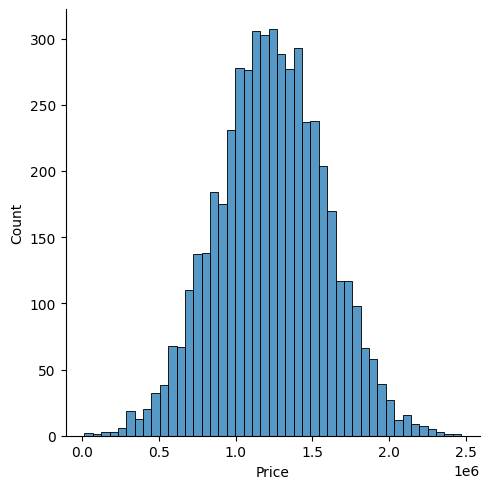

<Figure size 1200x800 with 0 Axes>

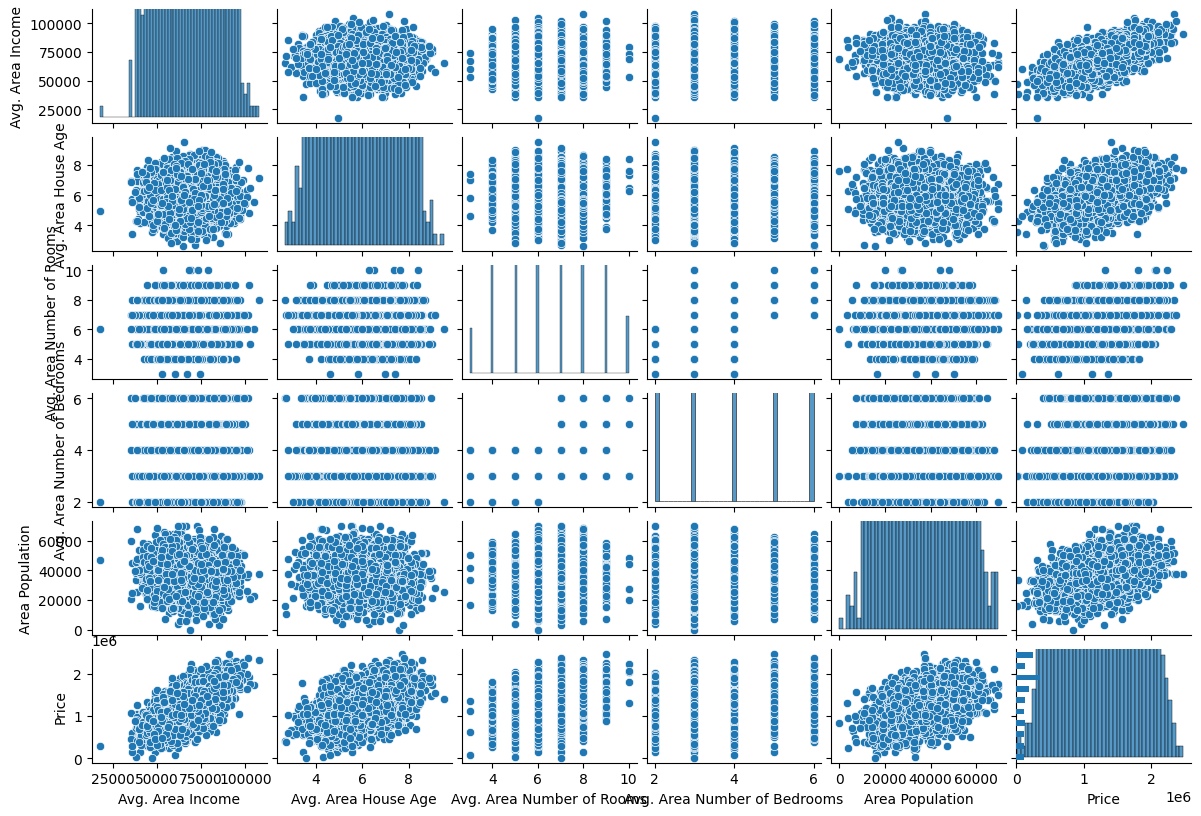

<Figure size 1000x800 with 0 Axes>

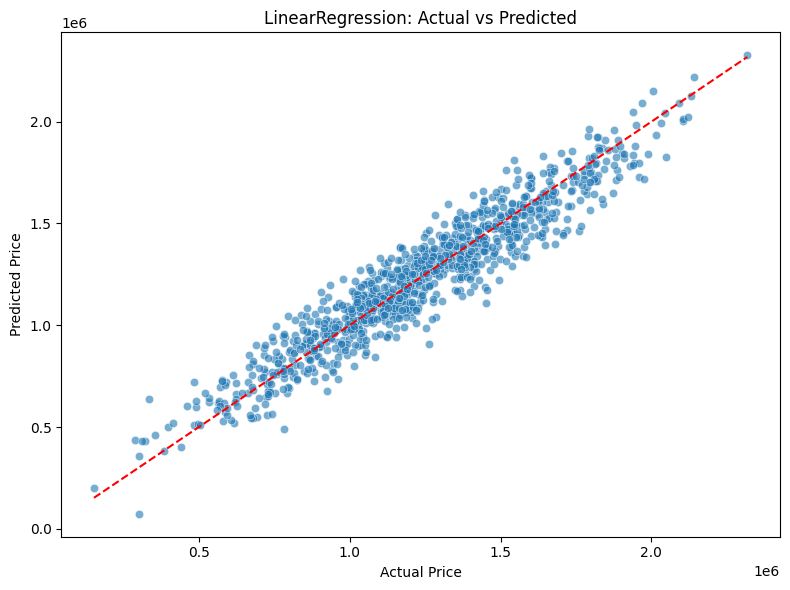

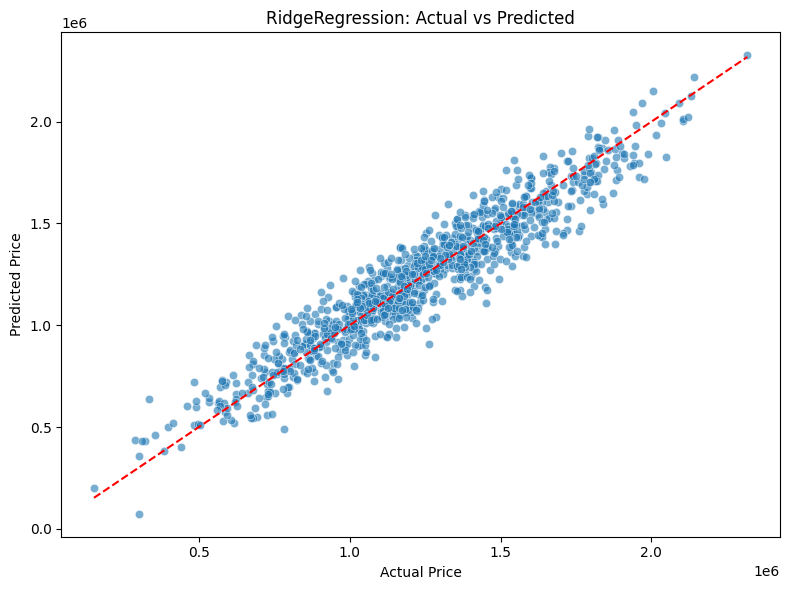

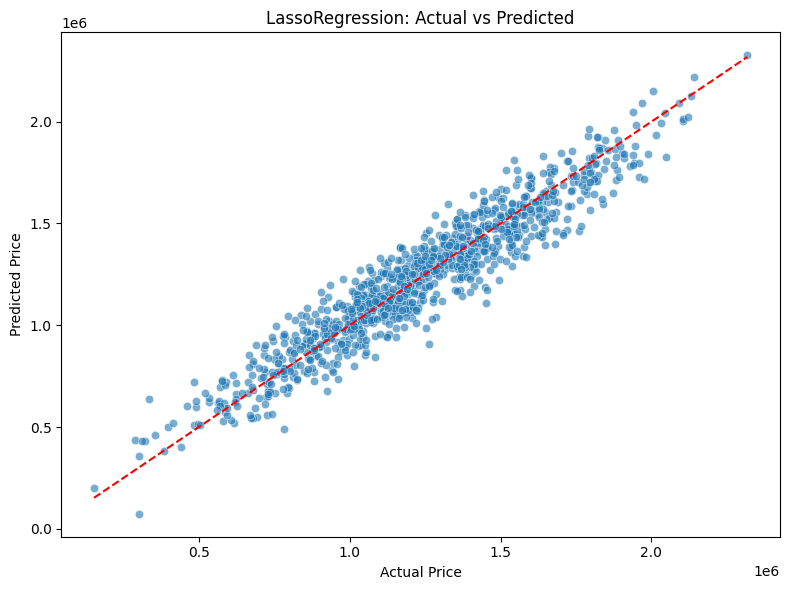

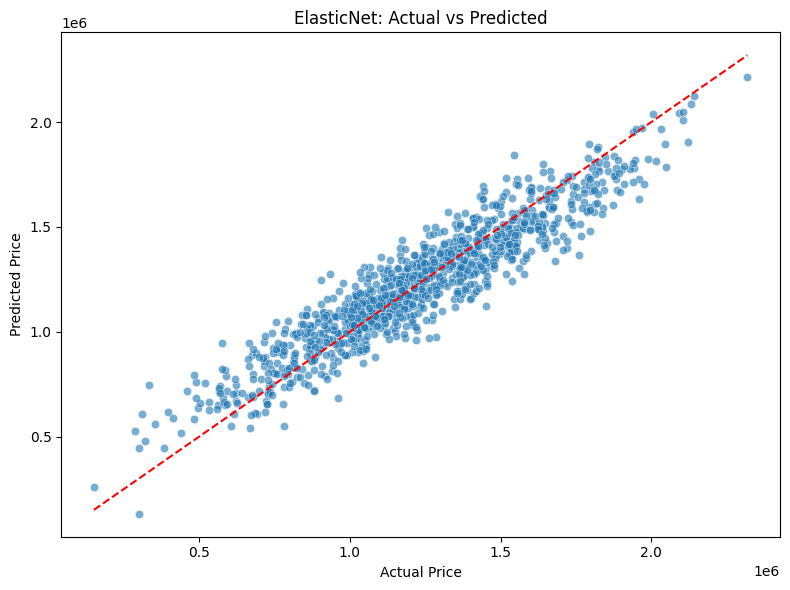

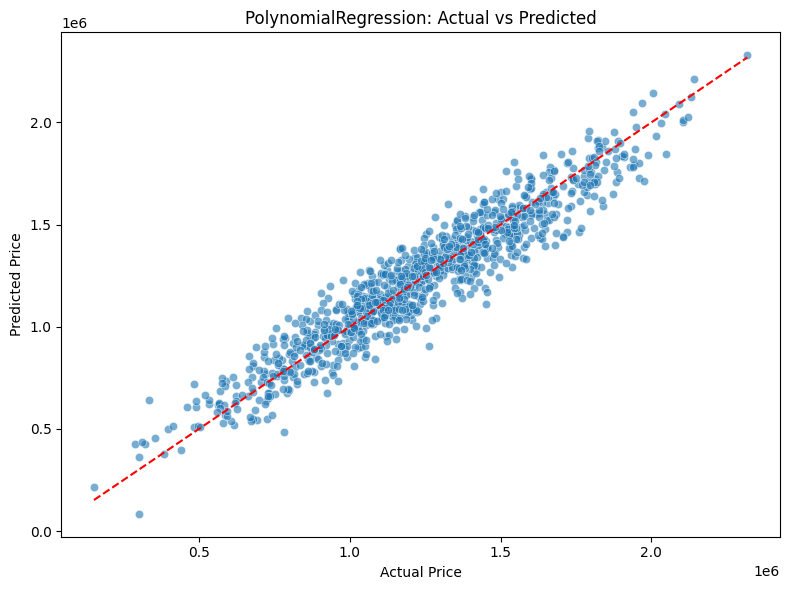

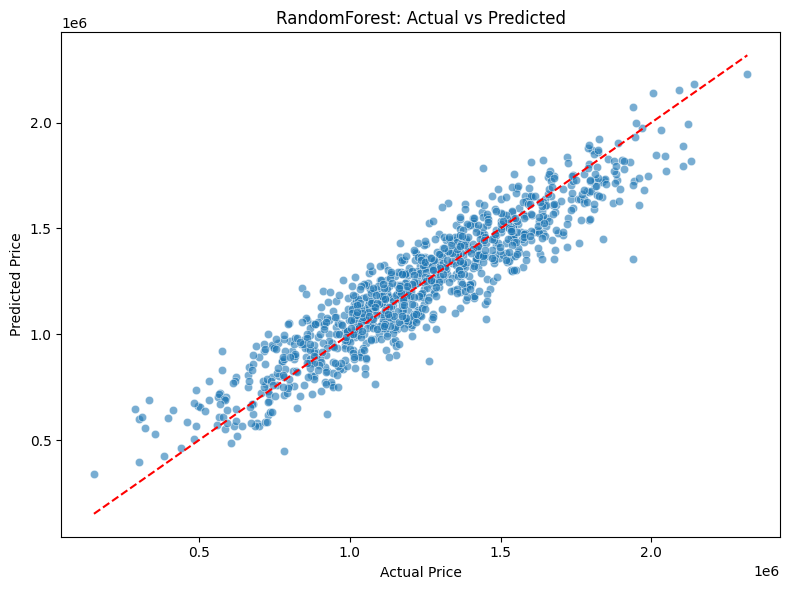

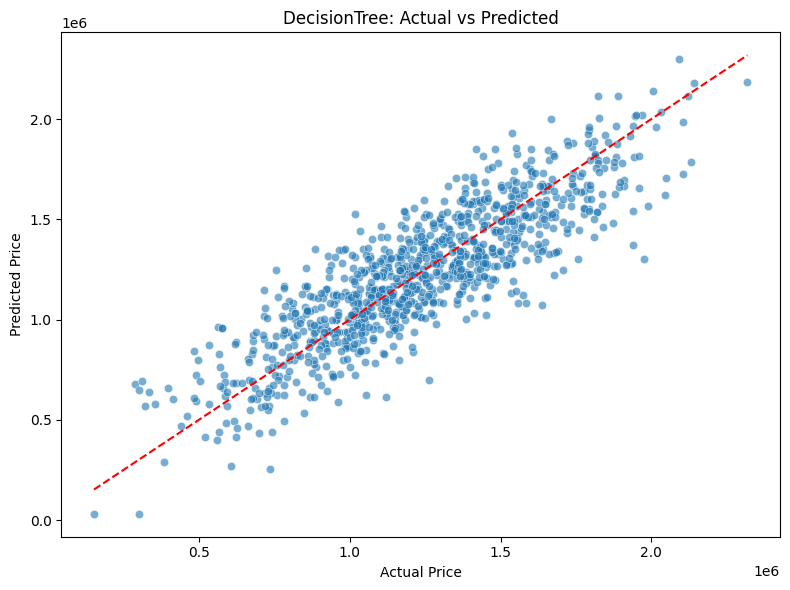

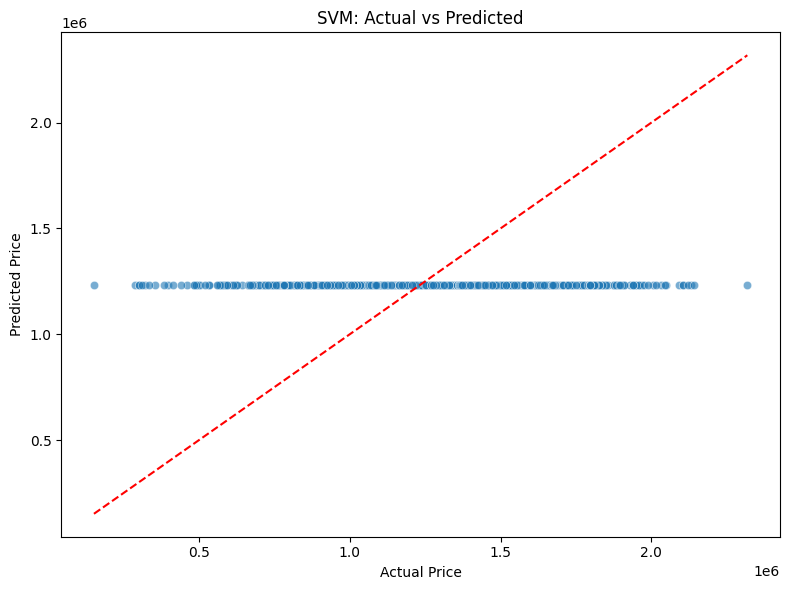

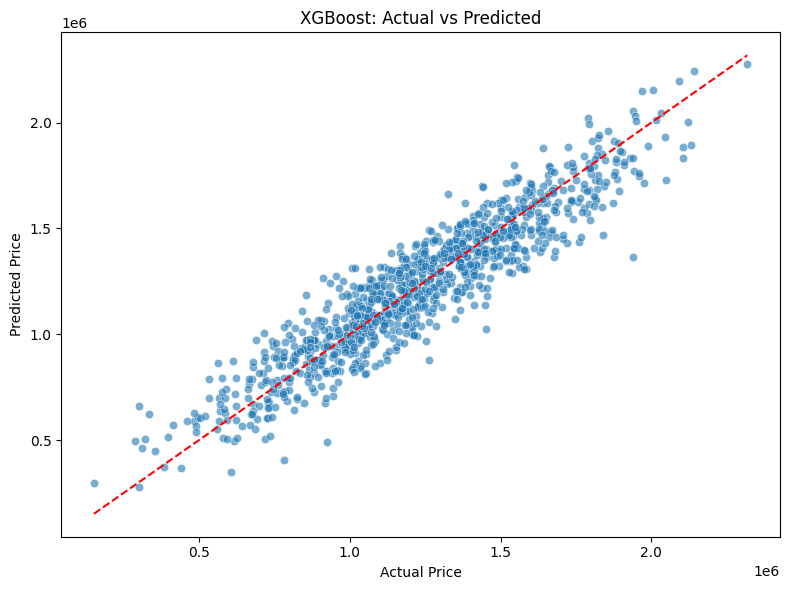

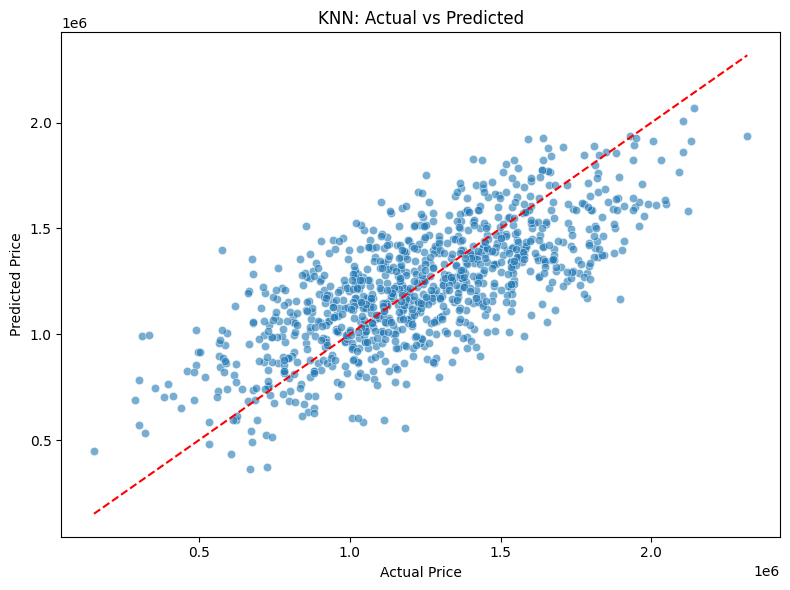

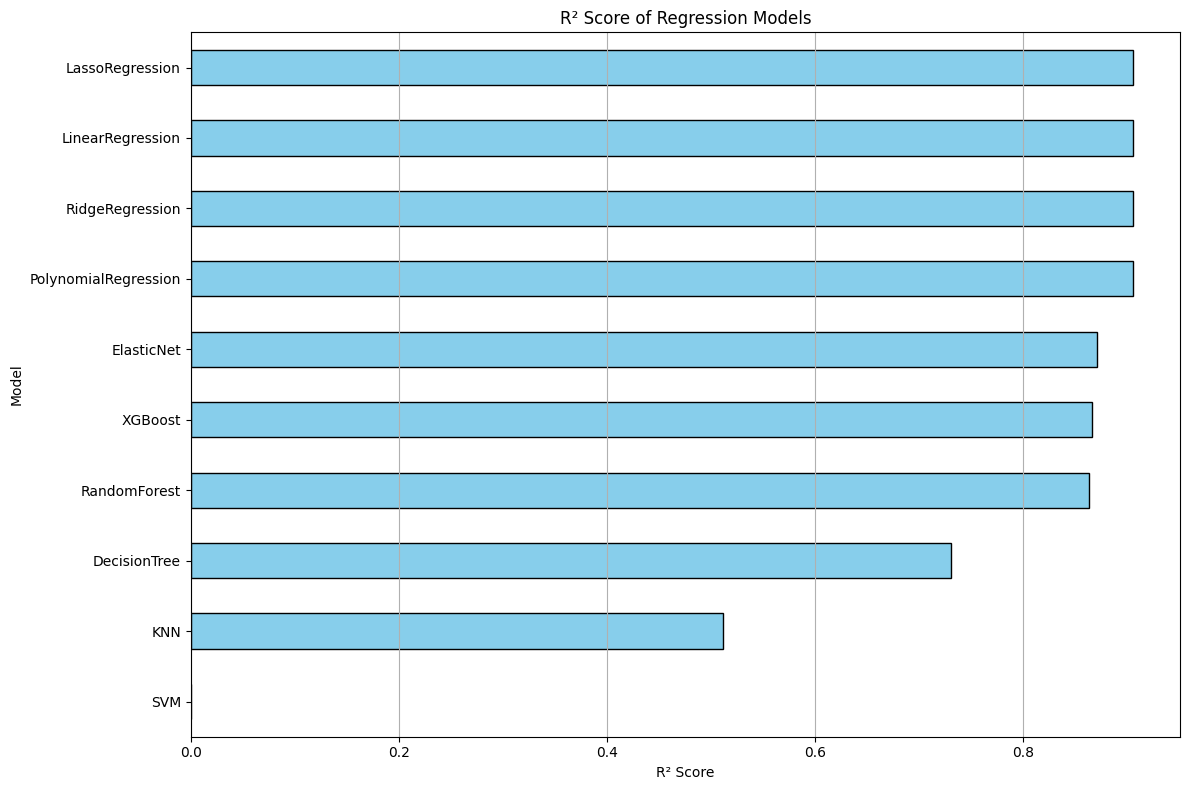

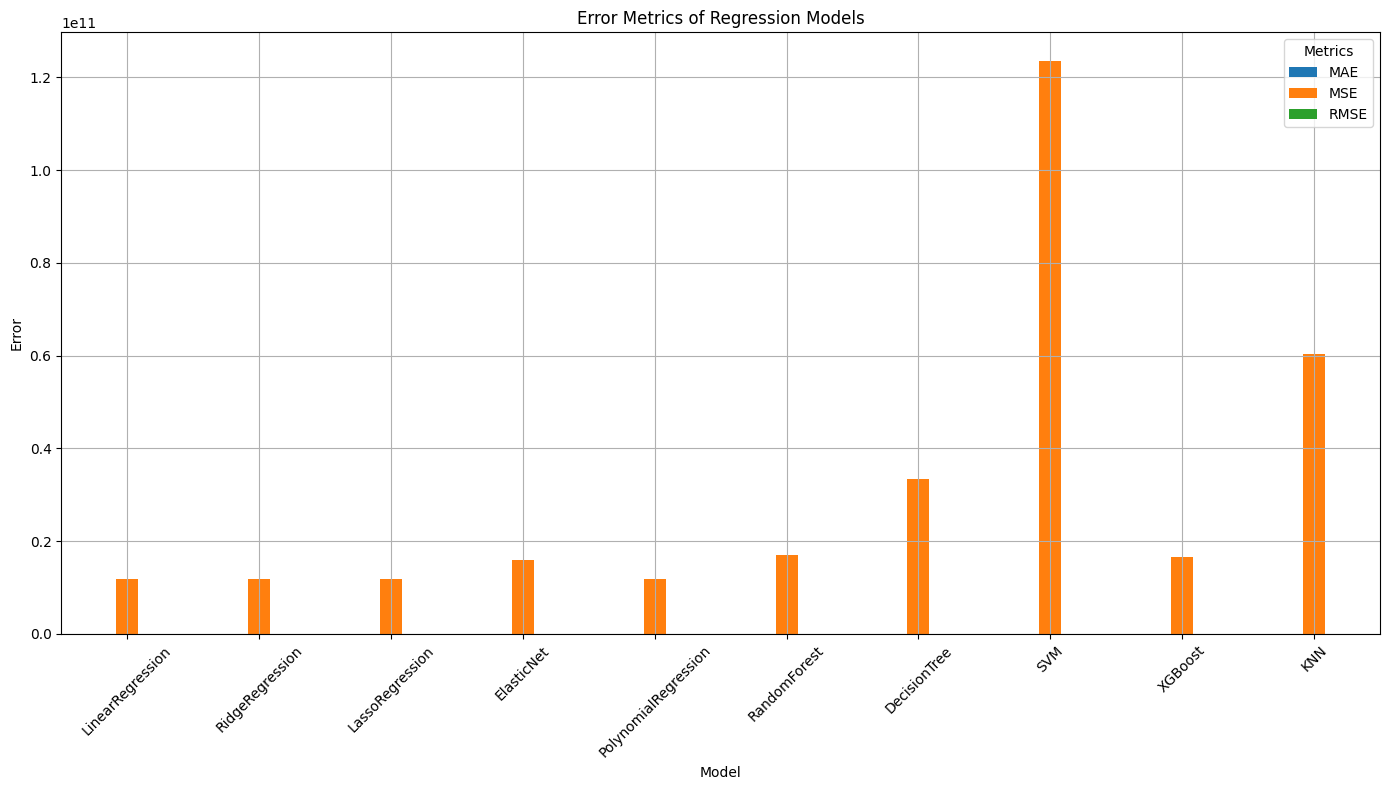

In [ ]:
!pip install hvplot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import hvplot.pandas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor)
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle

# Load dataset
data = pd.read_csv('USA_Housing.csv')

#Preprocessing
#data Understanding
print(data.head())
print(data.tail())
print(data.describe())
print(data.columns)
print(data.dtypes)
print(data.info())
print(data.nunique())
print(data.duplicated().sum())
print(data.isnull())
print(data.isnull().sum())
print(data.notnull())
print(data.notnull().sum())
#Data Cleaning
#Data TransFormation"""
data['Avg. Area Number of Rooms']=data['Avg. Area Number of Rooms'].astype('int')
print(data)
data['Avg. Area Number of Bedrooms']=data['Avg. Area Number of Bedrooms'].astype('int')
print(data)
X = data.drop(['Price', 'Address'], axis=1)
y = data['Price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define models
models = {
      'LinearRegression': LinearRegression(),
    'RidgeRegression': Ridge(),
    'LassoRegression': Lasso(),
    'ElasticNet': ElasticNet(),
    'PolynomialRegression': Pipeline([
        ('poly', PolynomialFeatures(degree=2)),
        ('linear', LinearRegression())
    ]),
    'RandomForest': RandomForestRegressor(),
    'DecisionTree':DecisionTreeRegressor(),
    'SVM': SVR(),
    'XGBoost': xgb.XGBRegressor(),
    'KNN': KNeighborsRegressor()
}

# Train and evaluate models
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse=np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results.append({
        'Model': name,
        'MAE': mae,
        'MSE': mse,
        'RMSE':rmse,
        'R2': r2
    })

    with open(f'{name}.pkl', 'wb') as f:
        pickle.dump(model, f)

# Convert results to DataFrame and save to CSV
results_df = pd.DataFrame(results)
results_df.to_csv('model_evaluation_results.csv', index=False)

print("Models have been trained and saved as pickle files. Evaluation results have been saved to model_evaluation_results.csv.")
plt.figure(figsize=(12,8))
sns.displot(data['Price'])
plt.figure(figsize=(12,8))
sns.pairplot(data)
results_df.set_index('Model', inplace=True)
results_df['RMSE'].plot(kind='barh', figsize=(12, 8))
data.hvplot.hist("Price")
#data.hvplot.scatter(x='Avg. Area House Age', y='Price')
data.hvplot.hist(by='Price', subplots=False, width=1000)
# Visualize predictions vs actual for each model
plt.figure(figsize=(10, 8))

# Visualize predictions vs actual for each model
# Use only one feature for clear polynomial curve visualization
X_poly_feature = data[['Avg. Area House Age']]
y_poly = data['Price']

# Transform to polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_poly_feature)

# Fit the model
model_poly = LinearRegression()
model_poly.fit(X_poly, y_poly)

# Predict
X_range = np.linspace(X_poly_feature.min(), X_poly_feature.max(), 300).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_range_pred = model_poly.predict(X_range_poly)


# Visualize predictions vs actual for each model
for name, model in models.items():
    y_pred = model.predict(X_test)

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal fit line
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"{name}: Actual vs Predicted")
    plt.tight_layout()
    plt.savefig(f'{name}_Actual_vs_Predicted.png')  # Optional: save plot
    plt.show()
 # Set index to model names
#results_df.set_index('Model', inplace=True)

# Plot R² scores
plt.figure(figsize=(12, 8))
results_df['R2'].sort_values().plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('R² Score of Regression Models')
plt.xlabel('R² Score')
plt.ylabel('Model')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

# (Optional) Plot MAE, MSE, RMSE together for comparison
results_df[['MAE', 'MSE', 'RMSE']].plot(kind='bar', figsize=(14, 8))
plt.title('Error Metrics of Regression Models')
plt.xlabel('Model')
plt.ylabel('Error')
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.grid(True)
plt.tight_layout()
plt.show()



